In [1]:
import os
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

#0 - has Tumor 
#1 - normal

OneHotEncoder()

In [4]:
#this cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'D:/Brain Tumer Images/yes_tumor'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
            
for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
paths = []
for r, d, f, in os.walk(r"D:/Brain Tumer Images/no_tumor"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(140, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(140,2)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result,test_size=0.2, shuffle=True, random_state=0)

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size= (2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size= (2, 2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               6

In [10]:
y_train.shape

(112, 2)

In [11]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose =1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 28s 6s/step - loss: 30.2053 - val_loss: 749.2435
Epoch 2/30
3/3 [==============================] - 11s 3s/step - loss: 26.2075 - val_loss: 124.8975
Epoch 3/30
3/3 [==============================] - 12s 4s/step - loss: 7.2899 - val_loss: 137.6259
Epoch 4/30
3/3 [==============================] - 8s 3s/step - loss: 5.0985 - val_loss: 111.9729
Epoch 5/30
3/3 [==============================] - 8s 2s/step - loss: 4.2593 - val_loss: 98.2681
Epoch 6/30
3/3 [==============================] - 8s 2s/step - loss: 2.1996 - val_loss: 100.1257
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 1.2060 - val_loss: 81.2496
Epoch 8/30
3/3 [==============================] - 8s 3s/step - loss: 1.9335 - val_loss: 52.8676
Epoch 9/30
3/3 [==============================] - 8s 2s/step - loss: 1.8542 - val_loss: 43.7104
Epoch 10/30
3/3 [==============================] - 8s 3s/step - loss: 0.4431 - val_loss: 50.2543
Epoch 11/30
3/3 [============

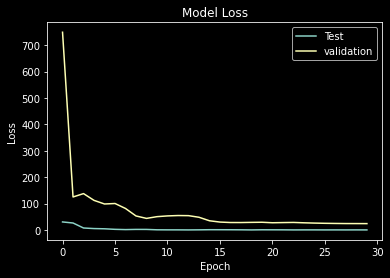

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'validation'], loc= 'upper right')
plt.show()

In [13]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'Its not a tumor'

100.0%Confidence This is not, No,Its not a tumor


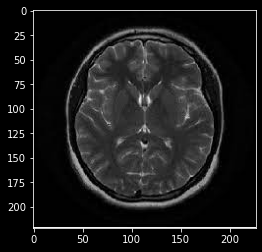

In [16]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:/Brain Tumer Images/no-tumor.jpg")
x = np.array(img.resize((128,128)))
x= x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '%Confidence This is not, ' + names(classification))

100.0%Confidence This Is, Its a Tumor


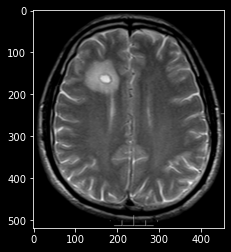

In [17]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:/Brain Tumer Images/yes_tumor/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '%Confidence This Is, ' +names(classification))

In [18]:
res

array([[1.000000e+00, 2.307157e-33]], dtype=float32)

<b> saving model </b>

In [19]:
model.save('Brain_tumor_pred.h5')

<b> loading model </b>

In [20]:
import tensorflow as tf
bt=tf.keras.models.load_model('Brain_tumor_pred.h5')

100.0%Confidence This is Its a Tumor


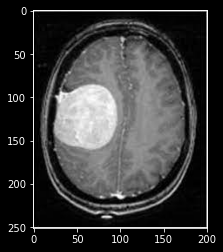

In [21]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:/Brain Tumer Images/tumor.jpg")
x = np.array(img.resize((128,128)))
x= x.reshape(1,128,128,3)
res = bt.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '%Confidence This is ' + names(classification))